In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process

In [2]:
df = pd.read_csv('/home/student/Documents/Data Set/deals_database - assessment.csv')

## Database Overview
This database serves as a repository for information related to venture capital investments in African startups. It provides a structured format for tracking key details about each investment deal, including the companies involved, their sectors, funding amounts, and investor information. This data is crucial for stakeholders interested in understanding investment trends, company performance, and market dynamics within the African startup ecosystem.

## Features of the Database
1. Company Name
   The official name of the startup or company receiving the investment.
   To identify the entity involved in the deal.

2. Founded In
   The year the company was established.
   To provide context regarding the company's maturity and experience in the market.

3. Sector
   The industry or market segment in which the company operates (e.g., fintech, healthtech).
   To categorize companies based on their business focus, facilitating sector-specific analysis.

4. Product
   A brief description of the company's primary product or service offering.
   To understand what solutions or innovations the company provides, highlighting its value proposition.

5. HQ Country
   The country where the company's headquarters is located.
   To identify the geographical base of operations for each company.

6. HQ City
   The city where the company's headquarters is situated.
   To provide more granular location data for regional analysis.

7. Africa HQ Country
   The country in Africa where the company has its headquarters (if different from HQ Country).
   To specify if the company's operations are localized within Africa.

8. Africa HQ City
   The city in Africa where the company's headquarters is located.
   Similar to HQ City but focused on African operations.

9. Operating Countries
   Countries where the company conducts business operations.
   To identify markets served by the company beyond its headquarters.

    
10. Africa Office Cities
    Cities in Africa where the company has offices.
    To provide insights into regional presence and operational footprint.

11. Exact Date
    The specific date when the deal was announced or finalized.
    To track timing and trends in investment activities.

12. Deal Year
    The year when the investment deal took place.
    To categorize deals chronologically for trend analysis.

13. Quarter
    The financial quarter during which the deal was announced (Q1, Q2, Q3, Q4).
    To analyze seasonal trends in venture investments.

14. Deal Announcement
    When the deal was announced to the public.

15. Deal Size (USD)
    The total amount of money invested in USD.
    To quantify financial commitments made to each startup.

16. Deal Size Range
    A range indicating potential variability in reported deal sizes (e.g., $10M-$15M).
    To accommodate uncertainty or variations in reported figures.

17. Deal Stage
    The stage of funding (e.g., Seed, Series A, Series B).
    To classify deals based on maturity and funding progression of startups.

18. Deal Type(s)
    Types of financing involved (e.g., equity, debt).
    To understand how investments are structured financially.

19. All Investors
    A list of all investors involved in funding rounds for each deal.
    To identify key players and trends within venture capital participation across deals.


## Data Cleaning

In [3]:
## Data Exploration, display the first few rows of the dataframe.
print(df.head())

               Company Name  Founded in                    Sector    Product  \
0                      TUNL        2020  Logistics & Supply Chain    Courier   
1  Zepz( Former WorldRemit)        2010                   Fintech  Transfers   
2                     Scale        2023                   Fintech   Payments   
3                      Gara        2022             Entertainment     Gaming   
4                     Buzza        2018                     Sport  SportTech   

                 HQ Country    HQ City Africa HQ Country Africa HQ City  \
0              South Africa  Cape Town      South Africa      Cape Town   
1            United Kingdom     London      South Africa   Johannesburg   
2  United States of America      Dover      South Africa   Johannesburg   
3                    France   Toulouse     Cote d’Ivoire            NaN   
4                   Nigeria      Lagos           Nigeria          Lagos   

                                       Ops Countries Africa Office C

In [4]:
## Check for missing values
print(df.isnull().sum())

Company Name            2
Founded in              0
Sector                  1
Product                 0
HQ Country              0
HQ City                 1
Africa HQ Country       0
Africa HQ City          4
Ops Countries           2
Africa Office Cities    3
Exact Date              0
Deal Year               1
Quarter                 3
Deal Announcement       0
Deal Size (USD)         0
Deal SIze Range         0
Deal stage              0
Deal type(s)            0
All Investors           0
dtype: int64


## Handle missing values in each column.

In [5]:
## Fill the mssing value in the Company Name column with "Unknown" as the value.
df.fillna({'Company Name': 'Unknown'}, inplace=True)

In [6]:
## Define a mapping dictionary for Product to Sectors
product_to_sector_mapping = {
    'EdTech': 'Education',
    'FinTech': 'Finance',
    'HealthTech': 'Healthcare',
    'AgriTech': 'Agriculture',
    'Ecommerce': 'Retail',
}

In [7]:
## Fill missing values in 'Sector' using the mapping based on 'Product'
df['Sector'].fillna(df['Product'].map(product_to_sector_mapping), inplace=True)

In [8]:
## Define a mapping dictionary for all african countries and their capital cities
country_to_city_mapping = {
    'Algeria': 'Algiers',
    'Angola': 'Luanda',
    'Benin': 'Porto-Novo',
    'Botswana': 'Gaborone',
    'Burkina Faso': 'Ouagadougou',
    'Burundi': 'Gitega',
    'Cabo Verde': 'Praia',
    'Cameroon': 'Yaoundé',
    'Central African Republic': 'Bangui',
    'Chad': 'N Djamena',
    'Comoros': 'Moroni',
    'Congo (Republic of the Congo)': 'Brazzaville',
    'Congo (Democratic Republic of the Congo)': 'Kinshasa',
    'Democratic Republic of the Congo': 'Kinshasa',
    'Djibouti': 'Djibouti',
    'Egypt': 'Cairo',
    'Equatorial Guinea': 'Malabo',
    'Eritrea': 'Asmara',
    'Eswatini': 'Mbabane',  
    'Ethiopia': 'Addis Ababa',
    'Gabon': 'Libreville',
    'Gambia': 'Banjul',
    'Ghana': 'Accra',
    'Guinea': 'Conakry',
    'Guinea-Bissau': 'Bissau',
    'Ivory Coast': "Yamoussoukro", 
    'Kenya': 'Nairobi',
    'Lesotho': 'Maseru',
    'Liberia': 'Monrovia',
    'Libya': 'Tripoli',
    'Madagascar': 'Antananarivo',
    'Malawi': 'Lilongwe',
    'Mali': 'Bamako',
    'Mauritania': 'Nouakchott',
    'Mauritius': 'Port Louis',
    'Morocco': 'Rabat',
    'Mozambique': "Maputo",
    "Namibia": "Windhoek",
    "Niger": "Niamey",
    "Nigeria": "Lagos",
    "Rwanda": "Kigali",
    "Sao Tome and Principe": "São Tomé",
    "Senegal": "Dakar",
    "Seychelles": "Victoria",
    "Sierra Leone": "Freetown",
    "Somalia": "Mogadishu",
    "South Africa": "Pretoria",  
    "South Sudan": "Juba",
    "Sudan": "Khartoum",
    "Tanzania": "Dodoma",
    "Togo": "Lomé",
    "Tunisia": "Tunis",
    "Uganda": "Kampala",
    "Zambia": "Lusaka",
    "Zimbabwe": "Harare",
    "France" : "Paris",
}

In [9]:
df['Africa HQ Country'] = df['Africa HQ Country'].str.strip()

In [10]:
## Update HQ City based on HQ Country using the country_to_city_mapping
df['HQ City'] = df['Africa HQ Country'].map(country_to_city_mapping)

In [11]:
## Update Africa HQ City based on Africa HQ Country using the country_to_city_mapping
df['Africa HQ City'] = df['Africa HQ Country'].map(country_to_city_mapping)

In [12]:
## Fill missing values in 'Ops Countries' with 'Africa HQ Country'
df['Ops Countries'] = df['Ops Countries'].fillna(df['Africa HQ Country'])

In [13]:
## Fill missing values in 'Africa Office Cities' with 'Africa HQ City'
df['Africa Office Cities'] = df['Africa Office Cities'].fillna(df['Africa HQ City'])

In [14]:
## Convert 'Exact Date' to datetime format
df['Exact Date'] = pd.to_datetime(df['Exact Date'], errors='coerce')

In [15]:
## Extract year from 'Exact Date' and fill 'Deal Year'
df['Deal Year'] = df['Exact Date'].dt.year

In [16]:
## Convert 'Exact Date' to datetime format
df['Exact Date'] = pd.to_datetime(df['Exact Date'], errors='coerce')

In [17]:
## Extract month from 'Exact Date' to determine the quarter
df['Quarter'] = df['Exact Date'].dt.month.apply(lambda x: (x - 1) // 3 + 1)

In [18]:
## Print the shape of the Dataframe to see how many rows remain
print(df.shape)

(73, 19)


## Data Visualization

## Analyze Funding Trend Over Time

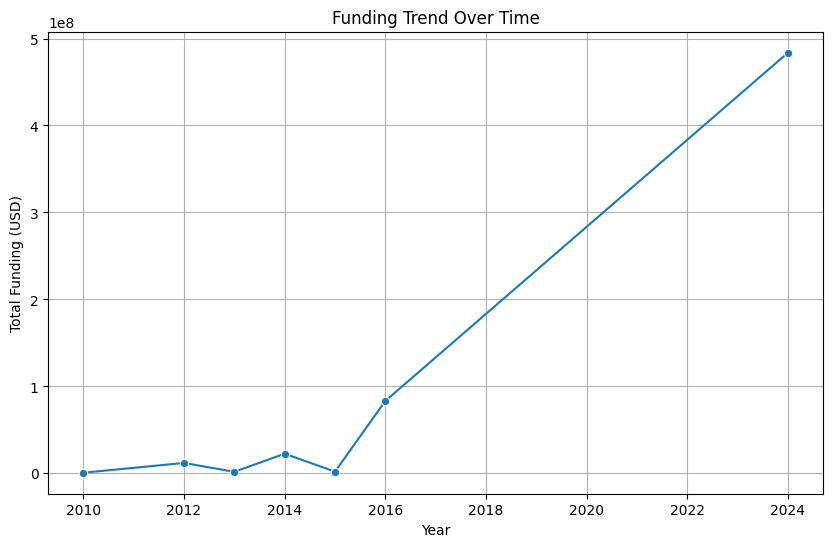

In [30]:
## Convert 'Exact Date' to datetime. 
df['Exact Date'] = pd.to_datetime(df['Exact Date'])

## Extraxt year from 'Exact Date'.
df['Deal Year'] = df['Exact Date'].dt.year

## Group by year and sum deal sizes.
funding_trend = df.groupby('Deal Year')['Deal Size (USD)'].sum().reset_index()

## Plot the funding trend.
plt.figure(figsize=(10, 6))
sns.lineplot(data=funding_trend, x='Deal Year', y='Deal Size (USD)', marker='o')
plt.title('Funding Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid()
plt.show()

## Analyze Sectors Performing Best in 2024

/tmp/ipykernel_30781/3027328330.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_performance, x='Deal Size (USD)', y='Sector', palette='viridis')


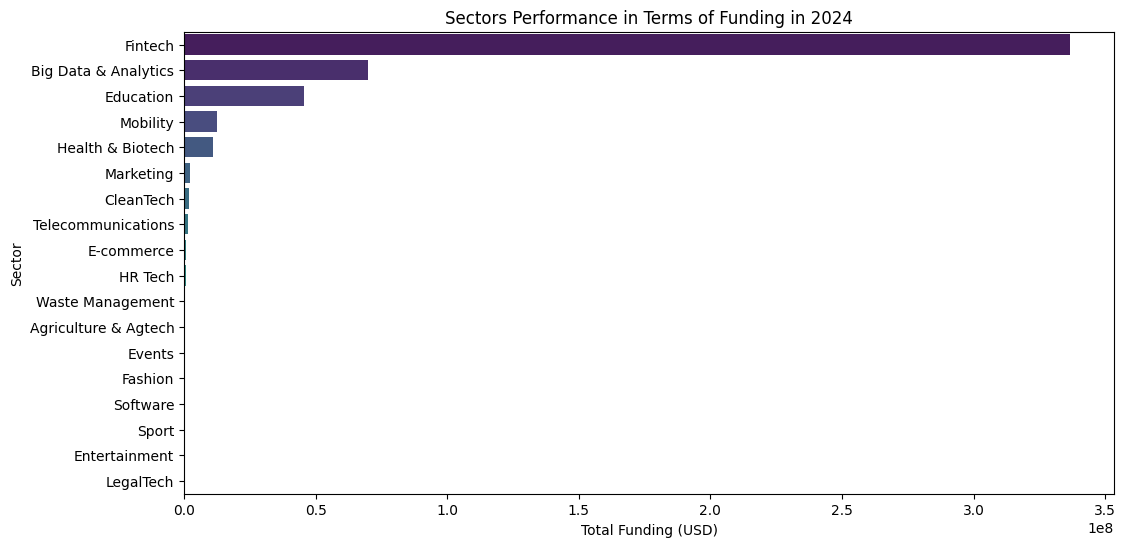

In [29]:
## Filter for 2024 data.
funding_2024 = df[df['Deal Year'] == 2024]

## Group by sector and sum deal sizes.
sector_performance = funding_2024.groupby('Sector')['Deal Size (USD)'].sum().reset_index()

## Sort values for better visualization.
sector_performance = sector_performance.sort_values(by='Deal Size (USD)', ascending=False)

## Plot sector performance.
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_performance, x='Deal Size (USD)', y='Sector', palette='viridis')
plt.title('Sectors Performance in Terms of Funding in 2024')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Sector')
plt.show()

## Analyze Countries Receiving Highest Proportion of Funding Over Time

NaN values in 'Deal Size (USD)' after conversion: 16


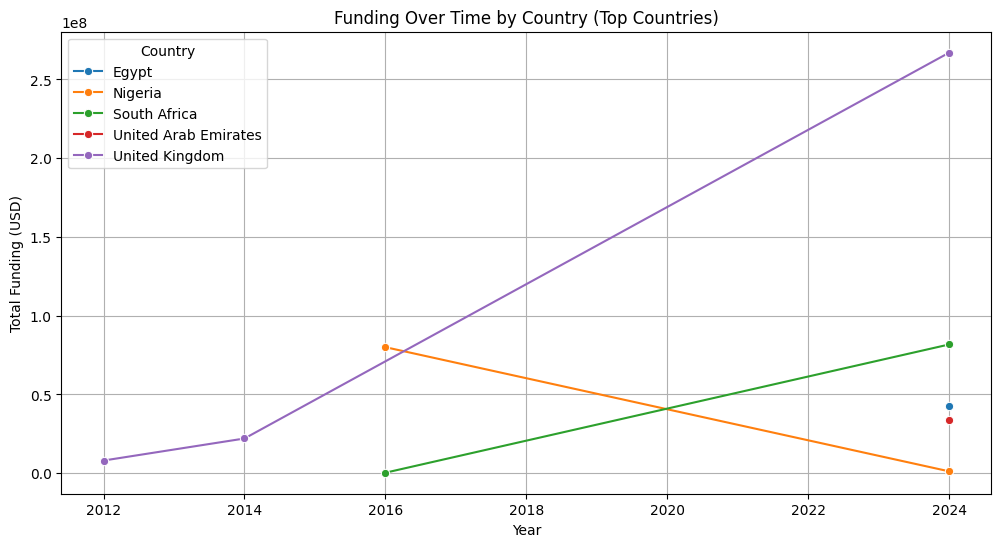

In [21]:
## Convert 'Deal Size (USD)' to numeric.
df['Deal Size (USD)'] = pd.to_numeric(df['Deal Size (USD)'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')

## Check for NaN values and handle them.
print("NaN values in 'Deal Size (USD)' after conversion:", df['Deal Size (USD)'].isna().sum())

## Drop rows with NaN in 'Deal Size (USD)'.
df.dropna(subset=['Deal Size (USD)'], inplace=True)

## Group by 'HQ Country' and 'Deal Year'
country_funding = df.groupby(['HQ Country', 'Deal Year'])['Deal Size (USD)'].sum().reset_index()

## Get top countries by total funding.
top_countries = country_funding.groupby('HQ Country')['Deal Size (USD)'].sum().nlargest(5).index
country_funding_top = country_funding[country_funding['HQ Country'].isin(top_countries)]

## Plot funding over time by country.
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_funding_top, x='Deal Year', y='Deal Size (USD)', hue='HQ Country', marker='o')
plt.title('Funding Over Time by Country (Top Countries)')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid()
plt.legend(title='Country')
plt.show()

In [23]:
file_path_csv = '/home/student/Documents/Data Set/cleaned_deals_database.csv'

In [24]:
df.to_csv(file_path_csv, index=False, encoding='utf-8')

In [25]:
print(f"Data saved to {file_path_csv}")

Data saved to /home/student/Documents/Data Set/cleaned_deals_database.csv


In [26]:
file_path_xls = '/home/student/Documents/Data Set/cleaned_deals_database.xlsx'

In [27]:
df.to_excel(file_path_xls, index=False)

In [28]:
print(f"Data saved to {file_path_xls}")

Data saved to /home/student/Documents/Data Set/cleaned_deals_database.xlsx
